## Practice (double thresholding)
1. Input images from video file WiiPlay.mp4 with the same level number as the last two digits of your student id.
2. Use <i>cv2.createTrackbar()</i> to create two trackbars.
3. Use <i>cv2.getTrackbarPos()</i> to get the current value of each trackbar.
4. Use <i>cv2.inRange()</i> to perform double thresholding based on the current values of two trackbars.
5. Show the output images.
6. Upload your Jupyter code file (*.ipynb)

In [8]:
import cv2
import numpy as np

cap = cv2.VideoCapture('WiiPlay.mp4')
# Check if the video file is opened correctly
if not cap.isOpened():
    raise IOError("Cannot open the video file")
    
def nothing(x):
    pass

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
#So make sure that you have the right parameters for the right video!
time_length = 210
fps=30
frame_seq = 3840
out_size = (640, 360)
out = cv2.VideoWriter('output.mp4', fourcc, 30.0, out_size)



#The first argument flag CAP_PROP_POS_FRAMES is a 0-based index of the frame to be decoded/captured next.
#The second argument defines the frame number in range from 0 to (time_length*fps - 1).
cap.set(cv2.CAP_PROP_POS_FRAMES , frame_seq);

ret, frame = cap.read()
cur_frame = cv2.resize(frame, out_size, 0, 0, interpolation=cv2.INTER_AREA)

cv2.namedWindow('410821312')
cv2.createTrackbar('threshold1', '410821312', 127, 255, nothing)
cv2.createTrackbar('threshold2', '410821312', 127, 255, nothing)
i = 0
while True:
    ret, frame = cap.read()
    if ret == False:
        break
    if i == 2500:
        break
    cur_frame = cv2.resize(frame, out_size, 0, 0, interpolation=cv2.INTER_AREA)   
    cur_frame = cv2.cvtColor(cur_frame, cv2.COLOR_BGR2GRAY)
    pos = cv2.getTrackbarPos('threshold1', '410821312')
    pos2 = cv2.getTrackbarPos('threshold2', '410821312')
    
    mask = cv2.inRange(cur_frame, pos, pos2) 
    c = cv2.waitKey(1)
    cv2.imshow('410821312', mask)
    #out.write(cur_frame)    
    i = i+1
    if c == 27:
        break
cap.release()
out.release()
cv2.destroyAllWindows()

### output img example
### 有另外加長影片的時間，影片單一關卡太短較不好操作(從level 12之後延長)
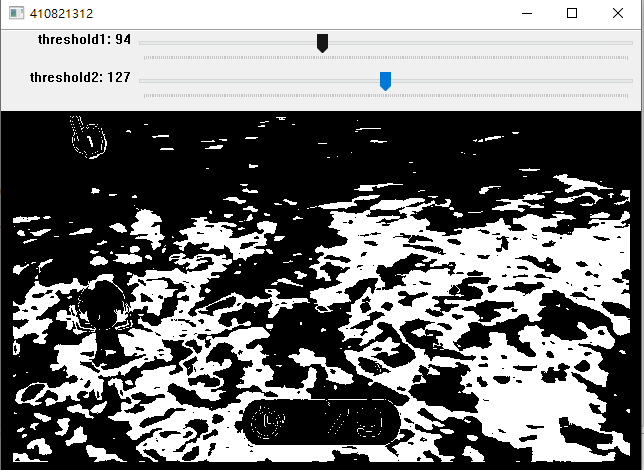



In [ ]:
import cv2
import numpy as np

img0 = cv2.imread('red_blood_cell.jpg', cv2.IMREAD_GRAYSCALE)
cv2.imshow('ori', img0)
retval, img = cv2.threshold(img0, 225, 255, cv2.THRESH_BINARY)
#kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(15,15))
kernel = np.ones((6, 6), np.uint8)

img_closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
cv2.imshow('Closing', img_closing)
"""
circles = cv2.HoughCircles(img_closing, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=20, maxRadius=40)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    cv2.circle(img_closing,(i[0],i[1]),i[2],(0,255,0),3)
    cv2.circle(img_closing,(i[0],i[1]),2,(0,0,255),3)
cv2.imshow('Closing', img_closing)
"""
cv2.waitKey()
cv2.destroyAllWindows()